In [ ]:
import pandas as pd
import seaborn as sb
import plotly.express as px
import numpy as np





In [ ]:
X_train = pd.read_csv('https://raw.githubusercontent.com/mohith99/group-project4-1/master/X.csv',error_bad_lines=False)
y_train = pd.read_csv('https://raw.githubusercontent.com/mohith99/group-project4-1/master/y_cat.csv',error_bad_lines=False)
X_test = pd.read_csv('https://raw.githubusercontent.com/mohith99/group-project4-1/master/X_test.csv',error_bad_lines=False)
y_test = pd.read_csv('https://raw.githubusercontent.com/mohith99/group-project4-1/master/y_test.csv',error_bad_lines=False)

In [ ]:
X_train.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,CollegeState_Andhra Pradesh,CollegeState_Assam,CollegeState_Bihar,CollegeState_Chhattisgarh,CollegeState_Delhi,CollegeState_Goa,CollegeState_Gujarat,CollegeState_Haryana,CollegeState_Himachal Pradesh,CollegeState_Jammu and Kashmir,CollegeState_Jharkhand,CollegeState_Karnataka,CollegeState_Kerala,CollegeState_Madhya Pradesh,CollegeState_Maharashtra,CollegeState_Meghalaya,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Gender_f,Gender_m,CollegeTier_1,CollegeTier_2,Specialization_CE,Specialization_CS,Specialization_EC,Specialization_EL,Specialization_ME,Specialization_other,GraduationYear_0,GraduationYear_2007,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017
0,84.3,95.8,78.00,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,85.4,85.0,70.06,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,85.0,68.2,70.00,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,85.6,83.6,74.64,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,78.0,76.8,73.90,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train.isnull().sum()

10percentage           0
12percentage           0
collegeGPA             0
English                0
Logical                0
                      ..
GraduationYear_2013    0
GraduationYear_2014    0
GraduationYear_2015    0
GraduationYear_2016    0
GraduationYear_2017    0
Length: 70, dtype: int64

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
import seaborn as sns

In [ ]:
X1=X_train.sample(frac=0.27)
Y1=y_train.sample(frac=0.27)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



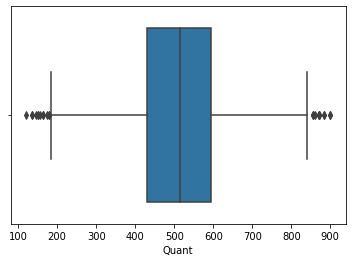

In [ ]:
sns.boxplot(X_train['Quant'])

In [ ]:
#feature scalling necessary for svm
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1=sc.fit_transform(X1)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

from sklearn.svm import SVC
classifier = SVC(C=2,kernel = 'rbf', random_state = 36)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=36, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[27, 11,  8,  4],
       [11, 11,  4,  4],
       [ 9,  3, 18,  5],
       [ 5,  3,  3, 25]])

In [ ]:
train_score = classifier.score(X_train, y_train)#accuracy (for classifiers)  is returned.
test_score = classifier.score(X_test, y_test)
print('Score on training set: {:.2f}'.format(train_score))
print('Score on test set: {:.2f}'.format(test_score))

Score on training set: 0.68
Score on test set: 0.54


In [ ]:
#PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(0.95)

In [ ]:
train_img=pca.fit_transform(X_train)
test_img=pca.fit_transform(y_train)

KeyError: ignored

In [ ]:
train_img

array([[-0.64494141, -1.78655783, -2.07967175, ...,  0.20538873,
         0.10286823, -0.56627299],
       [-3.36496706,  0.47371774, -0.03288834, ...,  1.49001138,
         0.3224119 ,  0.29309164],
       [ 0.45256541, -1.44093111, -2.3844916 , ..., -0.64997652,
         0.3648776 ,  0.62584405],
       ...,
       [-0.26934014, -1.91711005, -0.85759903, ..., -1.16079832,
        -0.8428702 ,  1.27222281],
       [ 2.88148551,  0.72011068,  0.9430408 , ..., -0.78459718,
        -2.08721515, -0.7629232 ],
       [ 1.37205966, -0.90096492,  0.5316736 , ..., -0.59176391,
         0.81962811, -0.82649908]])

In [ ]:
classifier = SVC(C=2,kernel = 'rbf', random_state = 36)
classifier.fit(train_img,test_img)

ValueError: ignored